【課程名稱】<font color=#FF0000>機器學習(Machine Learning, ML)</font><br>
【授課講師】[陳祥輝 (mail : HsiangHui.Chen@gmail.com)](mailto:HsiangHui.Chen@gmail.com)<br>
【facebook】[陳祥輝老師的臉書 (歡迎加好友)](https://goo.gl/osivhx)<br>
【相關課程】[東吳推廣數位資訊學苑陳祥輝老師的課程表](https://www.ext.scu.edu.tw/courses_search.php?key=陳祥輝)<br>

【課程大綱】
1. 階層式集群分析法 (Hierarchical Cluster Analysis)
    * 1-1 Centroid method
    * 1-2 Nearest-neighbor  or single-linkage method
    * 1-3 Farthest-neighbor or complete-linkage method
    * 1-4 Average-linkage method
    * 1-5 Ward’s method
2. 非階層式集群分析法(Non-Hiearchical Cluster Analysis)
    * k-means
    * DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [1]:
# !pip install --upgrade seaborn

In [1]:
!pip install --upgrade yellowbrick

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB 1.3 MB/s eta 0:00:01
   ------------------------ --------------- 174.1/282.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 2.9 MB/s eta 0:00:00


In [1]:
# -*- coding: utf-8 -*-
from platform import python_version
import os, time, glob, socket
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import sklearn
from sklearn import cluster, metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score

import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer, silhouette_visualizer

import scipy
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【Python】{}".format(python_version()))
print("【sklearn】{}".format(sklearn.__version__))
print("【seaborn】{}".format(sns.__version__))
print("【scipy】{}".format(scipy.__version__))
print("【yellowbrick】{}".format(yellowbrick.__version__))

# %autosave 120

【日期時間】2025/04/18 18:47:19
【工作目錄】E:\ml\code
【主機名稱】502-11 (10.100.52.11)
【Python】3.12.4
【sklearn】1.4.2
【seaborn】0.13.2
【scipy】1.13.1
【yellowbrick】1.5


In [2]:
from matplotlib.font_manager import FontProperties  
winfont01 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
winfont02 = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=12) 

# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字型為微軟正黑體
# plt.rcParams['axes.unicode_minus'] = False                # 解決負號顯示問題

# macfont = FontProperties(fname="/Library/Fonts/Arial Unicode.ttf", size=10) 

【資料來源】<https://www.saedsayad.com/clustering_hierarchical.htm>  
- Hierarchical Cluster
    - Agglomerative : 由下而上的方法，它將最相似的兩個點合併，直到所有點都合併到一個群集中為止。
    - Divisive : 由上而下的方法，首先將所有點作為一個群，並在每一步拆分最少的相似簇，直到僅剩下單個數據點。
<img src="https://www.saedsayad.com/images/Clustering_h1.png" width=500 align=left></img>

[Example: Agglomerative Hierarchical Clustering](https://online.stat.psu.edu/stat555/node/86/) : 簡單計算過程

### <font color='red'>1. 階層式集群分析法 (Hierarchical Cluster Analysis)</font>
* 1-1 Centroid method
    - 先計算兩群各自的中心點，這兩個中心點的距離當成這兩群的距離
    - $L(r, s) = D(c_r , c_s)$
        - $c_r$ : The centroid of cluster $r$.
        - $c_s$ : The centroid of cluster $u$.
* 1-2 Nearest-neighbor  or single-linkage method (min)
    - 找出兩群之間最近的兩點，這兩點的距離當成這兩群的距離
    - $L(r, s) = min(D(x_{ri} , y_{sj}))$
    - <https://www.saedsayad.com/images/Clustering_single.png>
* 1-3 Farthest-neighbor or complete-linkage method (max)
    - 找出兩群之間最遠的兩點，這兩點的距離當成這兩群的距離
    - $L(r, s) = max(D(x_{ri} , y_{sj}))$    
    - <https://www.saedsayad.com/images/Clustering_complete.png>
* 1-4 Average-linkage method
    - 計算兩群之間每一點的距離加總後再平均
    - $L(r,s)=\frac{1}{n_r \times n_s}\sum_{i=1}^{n_r}\sum_{j=1}^{n_s}D(x_{ri},x_{sj})$    
    - <https://www.saedsayad.com/images/Clustering_average.png>
* 1-5 Ward’s method (最小平方法)
    - 兩群間的距離定義為，在將兩群合併後，各點到合併後群中心點的距離平方和（其中，$\mu$ 表示 $C_i \cup C_j$ 的平均值）
    - Euclidean : 距離的平方和(Squared Euclidean Distance)
    - $d(C_r, C_s) = \sum_{a_i\in C_r \cup C_s}\lVert a_i-\mu\rVert$

【不同距離的說明】
- [各種距離 歐式距離、曼哈頓距離、切比雪夫距離、閔可夫斯基距離、標準歐氏距離、馬氏距離、余弦距離、漢明距離、傑拉德距離、相關距離、信息熵](https://www.itread01.com/content/1524567619.html)
- 歐式距離(Euclidean)（以二維空間為例）: $d(P_1, P_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$
- 曼哈頓距離(Manhattan)（以二維空間為例）: $d(P_1, P_2) = |x_1-x_2| + |y_1 - y_2|$

#### 1-1 Centroid method
<img src="http://180.218.162.136:2018/Images/PyML/Centroid method.png" width=300 align=left></img>

#### 1-2 Nearest-neighbor  or single-linkage method (min)
這個single 比較有可能容易有裙帶關西 就像水滴一樣
<img src="http://180.218.162.136:2018/Images/PyML/Single-linkage method.png" width=300 align=left></img>

#### 1-3 Farthest-neighbor or complete-linkage method (max)  
<img src="http://180.218.162.136:2018/Images/PyML/Complete-linkage method.png" width=300 align=left></img>

#### 1-4 Average-linkage method  
<img src="http://180.218.162.136:2018/Images/PyML/Average-linkage method.png" width=300 align=left></img>

#### 1-5 Ward’s method (最小平方法)  
<img src="http://180.218.162.136:2018/Images/PyML/Ward method.png" width=300 align=left></img>

### [ 兩階段驗證 ]
先階層 在非階層 <br>
階層：一旦你們同群 以後都會同群 <br>
非階層：每次都重新分配它們 <br>

In [19]:
fname = r'C:/Data/PyMLData/iris.csv'
iris = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')
print(iris.shape)
iris.head(3)
X = iris.iloc[:,2:4].values

(150, 5)


In [20]:
import scipy.cluster.hierarchy as sch

In [21]:
dist = sch.linkage(y=X, method='ward', metric='euclidean',)
print(type(dist))
print(dist.shape)

# 這裡因為是五個點 所以會少一

<class 'numpy.ndarray'>
(149, 4)


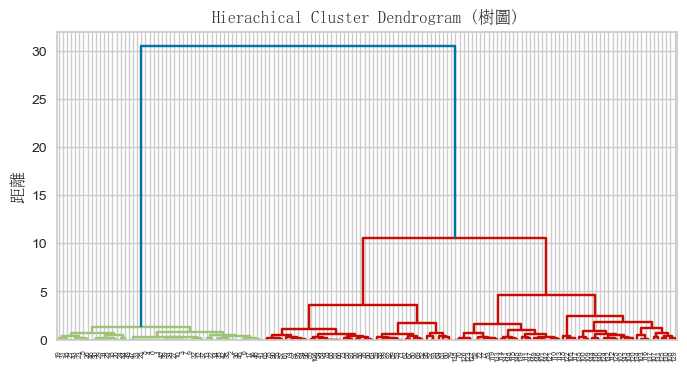

In [22]:
plt.figure(figsize=[8, 4])

sch.dendrogram(Z=dist, orientation='top',)
plt.title("Hierachical Cluster Dendrogram (樹圖)", fontproperties=winfont01)
plt.ylabel("距離", fontproperties=winfont01)
plt.show()

#### <font color=blue>sch.dendrogram() : 參數說明</font>
- p : 與 truncate_mode 配合使用
- truncate_mode : 
    - lastp : 代表最後只留 p 群的樹圖
    - level : 代表最後只留 p 層

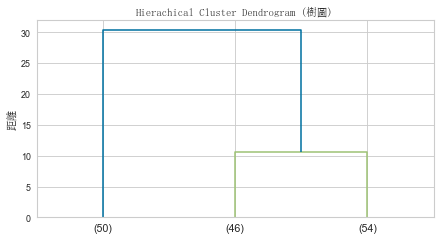

In [23]:
plt.figure(figsize=[8, 4])

sch.dendrogram(Z=dist, orientation='top',
               p=3, truncate_mode="lastp",)   #  這兩個參數搭配使用
plt.title("Hierachical Cluster Dendrogram (樹圖)", fontproperties=winfont01)
plt.ylabel("距離", fontproperties=winfont01)
fig = plt.gcf()
fig.set_dpi(64)  #讓圖形變小一點點
plt.show()

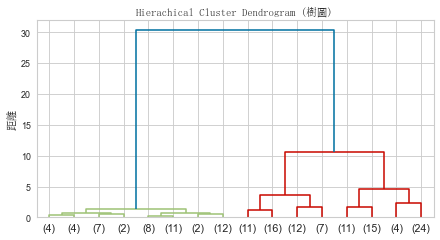

In [24]:
plt.figure(figsize=[8, 4])

sch.dendrogram(Z=dist, orientation='top',
               p=3, truncate_mode="level",)  # level 是層
plt.title("Hierachical Cluster Dendrogram (樹圖)", fontproperties=winfont01)
plt.ylabel("距離", fontproperties=winfont01)
fig = plt.gcf()
fig.set_dpi(64)
plt.show()

### 【參考資料】sklearn.cluster  
[sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
- linkage : {"ward", "complete", "average", "single"}, default="ward"

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
# 每一個這個都是一個類別產生一個物件
model = AgglomerativeClustering(n_clusters=3,               # n_clusters-幾群 & distance_trhreshold-距離多少 兩者只能擇一使用
                                metric='euclidean',
                                linkage='ward',
                                distance_threshold=None,)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
print(model.linkage)                 # ward 沃德階層分群法
print(model.n_clusters_)             # 幾群
print(model.labels_)                 # 猜出來是多少
print(model.metric)                  # 歐式距離
print(model.distance_threshold)      # 距離多少 前面沒給

ward
3
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
euclidean
None


### [ Cluster ]
沒有y <br> 
他透過x去把它分群 歐式距離近的同一群 <br>
可以想像的到如類別的資料就會有點不適合

#### <font color=red>貼標籤</font>

In [28]:
iris["label_ward"] = model.labels_
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,label_ward
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [29]:
iris.insert(loc=0, column="label_ward_2", value=model.labels_)
iris.head()
# 這個跟剛剛效果一樣只是他可以決定你要放在哪一個位置
# 但是這個如果執行第二次會錯誤 因為你已經存在惹

,label_ward_2,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,label_ward
0,1,5.1,3.5,1.4,0.2,setosa,1
1,1,4.9,3.0,1.4,0.2,setosa,1
2,1,4.7,3.2,1.3,0.2,setosa,1
3,1,4.6,3.1,1.5,0.2,setosa,1
4,1,5.0,3.6,1.4,0.2,setosa,1


#### <font color=red><b>比較一下原本的類別(Species)與分群後的群號(label)之間是否有關係</b></font>

In [30]:
pd.crosstab(index=iris["Species"],
            columns=iris["label_ward"],
            rownames=["Species"],
            colnames=["label_ward"],)

label_ward,0,1,2
Species,,,
setosa,0,50,0
versicolor,5,0,45
virginica,49,0,1


#### <font color=blue><b>很多人：降維PCA -> cluster去做分群 -> 貼標籤 -> 分類 -> 預測 </b></font>

### <font color=#0000FF>資料探索</font>

[【資料集來源】](https://cs.uef.fi/sipu/datasets/)

1. Aggregation.txt  # N=788,  k=7, D=2 
2. Compound.txt     # N=399,  k=6, D=2 
3. pathbased.txt    # N=300,  k=3, D=2
4. spiral.txt       # N=312,  k=3, D=2
5. D31.txt          # N=3100, k=31, D=2 
6. R15.txt          # N=600,  k=15, D=2
7. jain.txt         # N=373,  k=2, D=2
8. flame.txt        # N=240,  k=2, D=2

In [ ]:
url = r"https://cs.uef.fi/sipu/datasets/"

files = ["Aggregation.txt","Compound.txt","pathbased.txt","spiral.txt",
         "D31.txt","R15.txt","jain.txt","flame.txt"]

#### <font color='blue'>測試不同的 linkage</font>

In [33]:
url = "https://cs.uef.fi/sipu/datasets/spiral.txt"
data = pd.read_csv(url, sep="\t")
X=data.values[:,:-1]

In [38]:
data

,31.95,7.95,3
0,31.15,7.30,3
1,30.45,6.65,3
2,29.70,6.00,3
3,28.90,5.55,3
4,28.05,5.00,3
...,...,...,...
306,15.75,13.85,2
307,15.65,14.05,2
308,15.65,14.25,2
309,15.65,14.50,2


In [36]:
X[:3,]

array([[31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ]])

In [ ]:
# 測試以下幾種方式的結果
linkages = ['single', 'complete', 'average', 'ward']

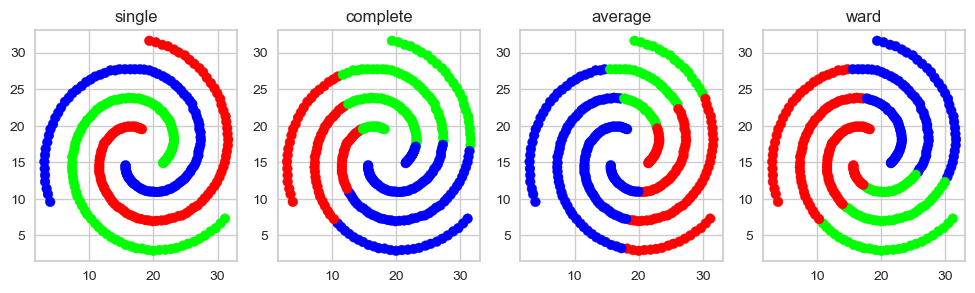

In [37]:
plt.figure(figsize=[12, 3])
X_=data.values[:,:]

for idx, linkage in enumerate(linkages, start=1) :
    model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    model.fit_predict(X)
    plt.subplot(1, 4, idx)
    plt.scatter(x=X[:, 0],
                y=X[:, 1],
                c=model.labels_,
                cmap="brg")             # cmap : color map
    plt.title(f"{linkage}")
# plt.scatter(x=X_[:, 0],
#             y=X_[:, 1],
#             c=X_[:, 2],
#             cmap="brg") 
# plt.title("Y real")
plt.show()

用螺旋的顏色去看這些方法 <br>
可以看的出來 single 容易產生裙帶關係 <br>
其他三個都是分群

### <font color='red'>2. 非階層式集群分析法(Non-Hiearchical Cluster Analysis)</font>
- 2-1 k-means
- 2-2 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

### <font color=#0000FF>2-1 k-means</font>
【重點提要】
1. 如何找k？畫scree plot
2. 為何麼每次跑k-means結果會不同，畫出10次的SSE
3. 測試不同的center

<img src="http://180.218.162.136:2018/Images/PyML/kmeans.jpg" width=600 align=left></img>

#### <font color=blue>總變異 = 群內距離 + 群間距離</font>
- `總變異` : 固定
- `群內距離` : 越小越好
- `群間距離` : 越大越好


<table align=left><tr>
<td><img src="http://180.218.162.136:2018/Images/PyML/總變異.jpg" width=250 align=left></img></td>
<td><img src="http://180.218.162.136:2018/Images/PyML/群內距離.jpg" width=250 align=left></img></td>
<td><img src="http://180.218.162.136:2018/Images/PyML/群間距離.jpg" width=250 align=left></img></td>
</tr>
</table>

In [39]:
fname = r'C:/Data/PyMLData/iris.csv'

iris = pd.read_csv(fname, sep=",", encoding='utf-8', engine='python')
iris_X = iris.iloc[:,:4]
iris_y = iris.iloc[:, 4]
print(iris.head())
print(iris_X.head())
print(iris_y.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object


In [41]:
from sklearn.cluster import k_means, KMeans

### [sklearn.cluster.k_means 函數](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html)

<font color=#0000FF>
cluster.k_means(
    X,
    n_clusters,
    sample_weight=None,
    init='k-means++',
    precompute_distances='auto',
    n_init=10,
    max_iter=300,
    verbose=False,
    tol=0.0001,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto',
    return_n_iter=False,
)
</font>    

In [46]:
result = k_means(X=iris_X, 
                 n_clusters=3, 
                 init='k-means++',
                 n_init='auto',
                 max_iter=300,            # 最多跑幾次 跌帶次數
                 verbose=False,           # 執行中的顯示訊息輛
                 tol=0.0001,              # tolerence
                 random_state=None, 
                 copy_x=True,
            )
# 如果收斂不了的話 先調整蝶帶次數(max_iter) -> 如果還是不行只能犧牲 tolerence (tol) 
print(type(result))
print(len(result))
print("【三群的中心點位置】")
print(result[0])
print("【分群後的群號】")
print(result[1])
print("【組內距離平方和(inertia)，如同SSE】")
print(result[2])

<class 'tuple'>
3
【三群的中心點位置】
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
【分群後的群號】
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
【組內距離平方和(inertia)，如同SSE】
78.85566582597731


### [sklearn.cluster.KMeans 類別](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


<font color=#0000FF>
class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
</font>    

In [48]:
model = KMeans(n_clusters=3,
               init='k-means++',
               n_init='auto',
               max_iter=300,
               tol=0.0001,
               verbose=0,
               random_state=None,
               copy_x=True,)
model.fit_predict(iris_X)

print(model.feature_names_in_)        # 使用的 X 變數名稱
print(model.labels_)                  # 分群後的群號
print(model.inertia_)                 # 群內距離平方和，想成是SSE

['Sepal.Length' 'Sepal.Width' 'Petal.Length' 'Petal.Width']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
78.85144142614601


#### <font color=red><b>【補充說明】</b></font>
- 利用 tipc.csv 的 total_bill, tip 進行 k-means 分3群，並繪出散布圖比較差異，並說明
- 處理過程
    - 不要標準化
    - 要標準化

In [53]:
fname = r"C:\Data\PyMLData\tips.csv"
data = pd.read_csv(fname)
print(data.shape)
data.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


(244, 2)


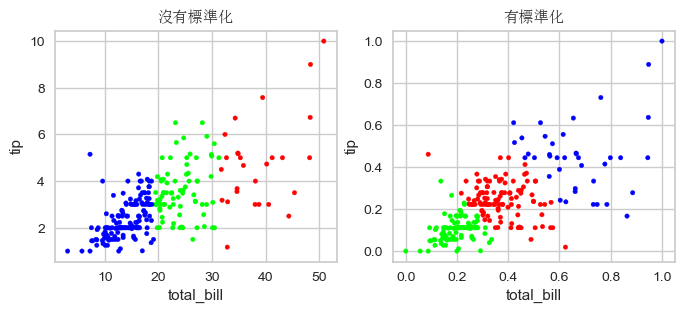

In [54]:
X = data.iloc[:, :2].to_numpy()
print(X.shape)

scaler = MinMaxScaler()
model = KMeans(n_clusters=3)

plt.figure(figsize=[8, 3])
for idx in [1, 2] :         # 1 : 沒有標準化, 2 : 有標準化
    plt.subplot(1, 2, idx)
    if idx == 1 :
        plt.title("沒有標準化", fontproperties=winfont01, fontsize=11)
        X_new = X.copy()
    else :
        plt.title("有標準化", fontproperties=winfont01, fontsize=11)
        X_new = scaler.fit_transform(X)
    model.fit_predict(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], 
                c=model.labels_,
                cmap="brg", s=10)        # s : size
    plt.xlabel("total_bill")
    plt.ylabel("tip")
    
plt.show()


#### <font color=blue> 從上圖的小結論</font>
- 沒有標準化：比較大的數值影響很強
- 有標準化：影響程度一半一半 skill一樣 分配的不一樣 如果切線越直表現影響越多 這個可以看出來沒有45度角 <br>

所以需要劃出頗面密度圖去看看他發生惹甚麼

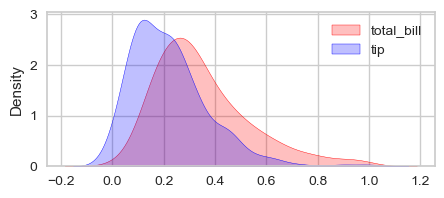

In [55]:
plt.figure(figsize=[5, 2])

sns.kdeplot(x=X_new[:, 0], fill=True, color="red", label="total_bill")
sns.kdeplot(x=X_new[:, 1], fill=True, color="blue", label="tip")
plt.legend()

plt.show()

#### <font color=red><b>【補充說明】</b></font>
- 利用 RFM.xlsx 的 消費次數, 總金額 進行 k-means 分3群，並繪出散布圖比較差異，並說明
    - Recency : 最近一次消費
    - Frequency : 消費頻率
    - Monetary : 消費金額
- 處理過程
    - 不要標準化
    - 要標準化

In [61]:
fname = r"C:\Data\PyMLData\RFM.xlsx"
data = pd.read_excel(fname)
print(data.shape)
data.head()

(19119, 5)


,CustomerID,最近一次消費日期,多久沒消費,消費次數,總金額
0,11012,2014-03-17,3796,2,81.26
1,11013,2014-06-23,3698,2,113.96
2,11014,2013-09-30,3964,2,138.45
3,11021,2013-06-25,4061,1,2371.96
4,11022,2013-06-22,4064,1,2322.28


(19119, 2)


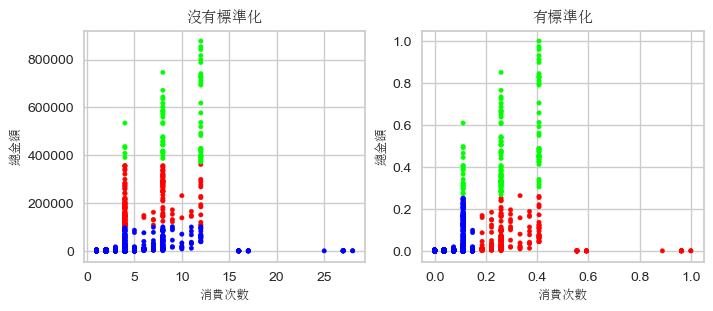

In [62]:
X = data.iloc[:, -2:].to_numpy()
print(X.shape)

scaler = MinMaxScaler()
model = KMeans(n_clusters=3)

plt.figure(figsize=[8, 3])
for idx in [1, 2] :         # 1 : 沒有標準化, 2 : 有標準化
    plt.subplot(1, 2, idx)
    if idx == 1 :
        plt.title("沒有標準化", fontproperties=winfont01, fontsize=11)
        X_new = X.copy()
    else :
        plt.title("有標準化", fontproperties=winfont01, fontsize=11)
        X_new = scaler.fit_transform(X)
    model.fit_predict(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], 
                c=model.labels_,
                cmap="brg", s=10)        # s : size
    plt.xlabel("消費次數", fontproperties=winfont01, fontsize=9)
    plt.ylabel("總金額", fontproperties=winfont01, fontsize=9)
    
plt.show()

#### <font color=blue> 從上圖的小結論</font>
- 沒有標準化：消費次數小 總金額數字很大 所以都是總金額來主導
- 有標準化：這裡不知道為什麼會這樣切 所以來看一下頗面圖 <br>

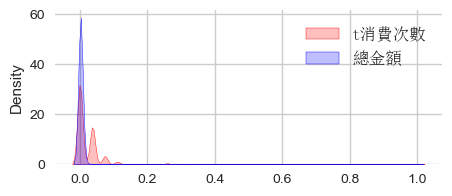

In [63]:
plt.figure(figsize=[5, 2])

sns.kdeplot(x=X_new[:, 0], fill=True, color="red", label="t消費次數")
sns.kdeplot(x=X_new[:, 1], fill=True, color="blue", label="總金額")
plt.legend(prop=winfont01)
plt.box(False)

plt.show()

可以看的出來比較小的部分是重疊再一起的 <br>
所以差不多切線是45度角 <br>
藍色的部分拉得很長 後面都有資料 <br>
有重疊又有差異很大的部分

#### <font color=blue> **要記得集群分析是計算距離 所以這裡需要先標準化</font>

但一定要標準化嗎??? <br>
不一定 因為如果你今天覺得總金額就是比較重要 我就是要讓它占比大那就不用 <br>
或是標準化後 在幫牠加上係數也可以

### <font color=#0000FF>評估集群數的方法</font>
- <font color=#0000FF>The elbow method</font>
    - To perform the elbow method, run several k-means, increment k with each iteration, and record the ***SSE***:
- <font color=#0000FF>The silhouette coefficient</font>
    - It quantifies how well a data point fits into its assigned cluster based on two factors:
        - How close the data point is to other points in the cluster
        - How far away the data point is from points in other clusters
    - ***Silhouette coefficient values range between -1 and 1.***
        - Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [64]:
fname = r'C:/Data/PyMLData/iris.csv'
iris = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')
X = iris.iloc[:,:-1].to_numpy()
print(X.shape)

(150, 4)


### <font color=#0000FF>Scree Plot (陡坡圖)</font>
原則上是k越小越好 如果只有落差一點點就選擇他 但如果陡降的話就不要再繼續了!

In [65]:
K = 10
sst = sum(sum((X-X.mean())**2))
print(f"SST : {sst}")
r2 = list() 

for k in range(2, K+1) :
    model = KMeans(n_clusters=k)
    model.fit_predict(X)
    r2.append(1 - (model.inertia_/sst))  # SSE - SST 

print(r2)

SST : 2337.63385
[0.9348281375372974, 0.9662668874229481, 0.9754521550646202, 0.9786203992296312, 0.983053869859579, 0.9853245557272302, 0.9845109672328937, 0.9851987856941846, 0.9881955054870073]


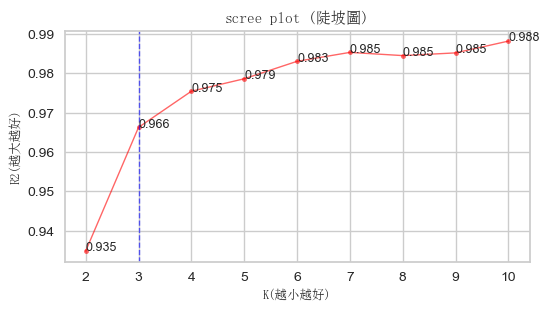

In [66]:
plt.figure(figsize=[6, 3])

plt.plot(range(2, K+1), r2, linestyle="-", linewidth=1, color="red", marker=".", alpha=0.6)
plt.xlabel("K(越小越好)", fontproperties=winfont01, fontsize=9)
plt.ylabel("R2(越大越好)", fontproperties=winfont01, fontsize=9)
plt.title("scree plot (陡坡圖)", fontproperties=winfont01, fontsize=11)

for x_, y_ in zip(range(2, K+1), r2) :
    plt.text(x_, y_, f"{y_:.3f}", fontsize=9)

# 標示自己選擇的 k
plt.axvline(x=3, ymin=0, ymax=1, linestyle="--", linewidth=1, color="blue", alpha=0.6)   # 這裡不是選擇3就是選擇4 自己決定惹

plt.show()

### <font color=#0000FF>The Elbow Method</font>
#### SST = WSS + BSS
- SST : Total Sum of Squares，總距離平方和
- WSS : Within Cluster Sum Squares，組內距離平方和，**越小越好**
- BSS : Between Clusters Sum of Squares，組間距離平方和，**越大越好**

### <font color=#0000FF>The silhouette coefficient (輪廓係數)</font>
- $s_i = \frac{b_i-a_i}{max(a_i,b_i)}$
    - $a_i$ : $a_i$ 為同群$C_I$內，點$i$ 至其他點的平均距離
        - $a_i=\frac{1}{|C_i|-1} \displaystyle\sum_{j\in C_I, i\neq j} d(i,j)$
    - $b_i$ : $b_i$ 為 點 $i$ 至異群的每一個點的平均距離，並找出最小 $b_i$ 的 點 $i$
        - $b_i=\displaystyle\min_{J\neq I} \frac{1}{|C_J|}\displaystyle\sum_{i\in C_I, j\in C_J}d(i,j)$
    - We now define a silhouette (value) of one data point i :
        - $s_i = \frac{b_i-a_i}{max\{a_i, b_i\}}, if |C_I|>1$
- 介於 -1 ~ 1 之間
    - 1: Means clusters are well apart from each other and clearly distinguished.
    - 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
    - -1: Means clusters are assigned in the wrong way.
- [Silhouette (clustering)](https://en.wikipedia.org/wiki/Silhouette_(clustering)) <font color=red>←【可點擊查看詳細數學公式】</font>

#### <font color=blue>The silhouette coefficient (輪廓係數)</font>

<table align=left><tr>
<td><img src="http://180.218.162.136:2018/Images/PyML/silhouette01.jpg" width=100% align=left></img></td>
<td><img src="http://180.218.162.136:2018/Images/PyML/silhouette02.jpg" width=100% align=left></img></td>
<td><img src="http://180.218.162.136:2018/Images/PyML/silhouette03.jpg" width=100% align=left></img></td>
</tr>
</table>

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer, silhouette_visualizer

#### <font color=blue>哺乳動物的睡眠時間</font>

In [ ]:
uri = "https://gist.githubusercontent.com/yppmark/d907dc265a84cac76ba7/raw/5b8a1c8df62cde2ba2b599cfa6404c6fd165ca02/SleepInMammals.csv"
mammals = pd.read_csv(uri)
print(mammals.shape)
mammals.head(3)

In [ ]:
mammals_X = mammals.iloc[:,1:]
mammals_Y = mammals.iloc[:, 0]

In [ ]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X=mammals_X)
print(type(kmeans))

print(kmeans.cluster_centers_)  # centroid
print(kmeans.labels_)           # label
print(kmeans.inertia_)          # inertia
print(kmeans.n_iter_)           # best_n_iter

In [ ]:
pd.crosstab(mammals_Y, kmeans.labels_)

#### <font color='blue'>2-2 DBSCAN (<u>D</u>ensity-<u>B</u>ased <u>S</u>patial <u>C</u>lustering of <u>A</u>pplications with <u>N</u>oise)</font>

<img src="http://180.218.162.136:2018/Images/PyML/DBSCAN.jpg" width=400 align=left></img>

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
fname = r'C:/Data/PyMLData/iris.csv'
iris = pd.read_csv(fname, sep=",", encoding='utf-8', engine='python')
X = iris.values[:, :-1]